# CONET on DLP+ Multiple Myeloma dataset
> P01-066 DLP+ dataset

Following the directions in CONET paper, we try pre-processing and inference
on clonal tree and copy number calling for the DLP+ dataset P01-066, which
features 683 cells described by counts in 6206 bins of 500kb.

(1105, 6206)


/Users/zemp/miniconda3/envs/victree310/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


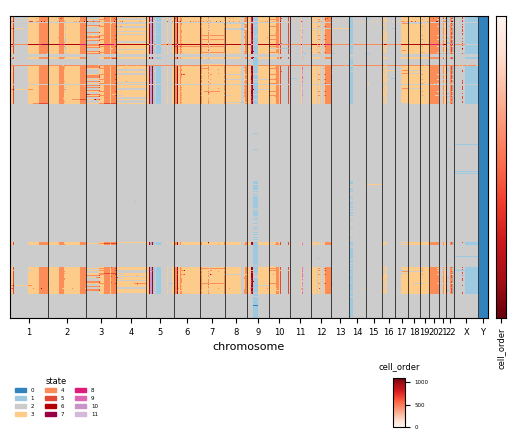

In [1]:
import anndata
import scgenome.plotting as pl

# adata = anndata.read_h5ad("/Users/zemp/phd/scilife/mskcc_data/P01-066_cn_data.h5ad")
adata = anndata.read_h5ad("/Users/zemp/phd/scilife/mskcc_data/signals_SPECTRUM-OV-014.h5")
print(adata.shape)
pl.plot_cell_cn_matrix_fig(adata, layer_name='state', cell_order_fields=['cell_order'], annotation_fields=['cell_order']);

/Users/zemp/miniconda3/envs/victree310/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


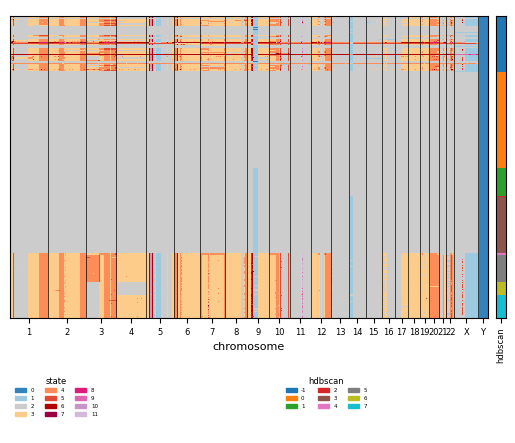

In [4]:
import hdbscan
clusterer = hdbscan.HDBSCAN(metric='manhattan', gen_min_span_tree=True, min_samples=30)
clusterer.fit(adata.layers['state'])
adata.obs['hdbscan'] = clusterer.labels_.astype(str)
g = pl.plot_cell_cn_matrix_fig(adata, layer_name='state', cell_order_fields=['hdbscan'], annotation_fields=['hdbscan']);

In [23]:
import numpy as np
g['annotation_info']['hdbscan']['level_colors']

{'-1': array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 '0': array([1.        , 0.49803922, 0.05490196, 1.        ]),
 '1': array([0.17254902, 0.62745098, 0.17254902, 1.        ]),
 '2': array([0.83921569, 0.15294118, 0.15686275, 1.        ]),
 '3': array([0.54901961, 0.3372549 , 0.29411765, 1.        ]),
 '4': array([0.89019608, 0.46666667, 0.76078431, 1.        ]),
 '5': array([0.49803922, 0.49803922, 0.49803922, 1.        ]),
 '6': array([0.7372549 , 0.74117647, 0.13333333, 1.        ]),
 '7': array([0.09019608, 0.74509804, 0.81176471, 1.        ])}

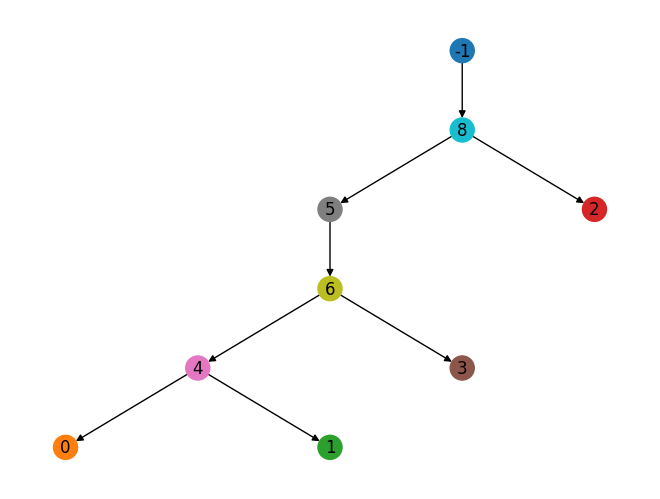

In [30]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
tree = nx.random_tree(9, create_using=nx.DiGraph)
tree = nx.relabel_nodes(tree, {i: str(i-1) for i in range(8)})
pos = graphviz_layout(tree, prog='dot')
nx.draw(tree, node_color=list(g['annotation_info']['hdbscan']['level_colors'].values()), with_labels=True, pos=pos)

## CONET preprocessing
> get breakpoint candidates from HMMcopy cn calling

In [22]:
from utils.preprocessing import convert_adata_to_conet_input

conet_df = convert_adata_to_conet_input(adata)

In [23]:
# conet_df.to_csv("/Users/zemp/phd/msk/conet-exp/p01-066_corr_counts.csv", index=False)
conet_df.to_csv("/Users/zemp/phd/msk/conet-exp/spectrum-ov-014_corr_counts.csv", index=False)

In [24]:
conet_df.head()

,chr,start,end,candidate_brkp,SPECTRUM-OV-014_S1_PELVIC_PERITONEUM-128736A-R23-C20,SPECTRUM-OV-014_S1_PELVIC_PERITONEUM-128736A-R45-C17,SPECTRUM-OV-014_S1_PELVIC_PERITONEUM-128736A-R20-C29,SPECTRUM-OV-014_S1_PELVIC_PERITONEUM-128736A-R22-C24,SPECTRUM-OV-014_S1_PELVIC_PERITONEUM-128736A-R30-C32,SPECTRUM-OV-014_S1_PELVIC_PERITONEUM-128736A-R24-C51,...,SPECTRUM-OV-014_S1_PELVIC_PERITONEUM-128736A-R47-C43,SPECTRUM-OV-014_S1_PELVIC_PERITONEUM-128736A-R54-C21,SPECTRUM-OV-014_S1_PELVIC_PERITONEUM-128736A-R50-C28,SPECTRUM-OV-014_S1_PELVIC_PERITONEUM-128736A-R25-C13,SPECTRUM-OV-014_S1_PELVIC_PERITONEUM-128736A-R22-C14,SPECTRUM-OV-014_S1_PELVIC_PERITONEUM-128736A-R19-C57,SPECTRUM-OV-014_S1_PELVIC_PERITONEUM-128736A-R19-C22,SPECTRUM-OV-014_S1_PELVIC_PERITONEUM-128736A-R46-C47,SPECTRUM-OV-014_S1_PELVIC_PERITONEUM-128736A-R27-C49,width
0,16,1,500000,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,499999
1,16,500001,1000000,1,1.941892,1.913584,1.849226,1.989187,2.881414,1.856293,...,2.660351,2.650362,2.699959,1.866015,1.826137,2.841504,2.026304,2.750746,1.792486,499999
2,16,1000001,1500000,1,1.758680,1.794613,1.779841,1.778186,2.531744,1.674836,...,2.480766,2.540778,2.411922,1.743153,1.829090,2.752496,1.820780,2.536755,1.672944,499999
3,16,1500001,2000000,1,2.003563,1.956691,2.039769,2.127014,2.098163,1.997214,...,2.061282,1.928667,1.979639,2.251513,2.124037,2.015344,2.034367,2.007709,1.967254,499999
4,16,2000001,2500000,1,1.974970,1.932053,2.101945,2.056070,1.972657,2.030012,...,1.876352,1.792186,1.854096,1.923770,1.961652,1.865617,1.817223,1.793197,2.086421,499999


In [20]:
adata.layers['copy'][:, :]

array([[       nan, 1.01835725,        nan, ..., 2.04249315, 2.05270712,
               nan],
       [       nan, 0.91069782,        nan, ..., 1.89714668, 2.05273167,
               nan],
       [       nan, 1.05468344,        nan, ..., 2.06038353, 2.26395837,
               nan],
       ...,
       [       nan, 1.91082786,        nan, ..., 2.82385329, 3.22292309,
               nan],
       [       nan, 1.16600168,        nan, ..., 1.93588484, 2.0599603 ,
               nan],
       [       nan, 0.98958025,        nan, ..., 2.36825592, 2.11136821,
               nan]])